<a href="https://colab.research.google.com/github/isiger/wqu_msc_fe/blob/main/Group_5_G_Notebook_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Work Submission I

## Environment setup

In [ ]:
#!/usr/bin/env python
# coding: utf-8

In [ ]:
!pip install yfinance
!pip install nelson-siegel-svensson
!pip install pmdarima
!pip install arch

     |████████████████████████████████| 5.5MB 5.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=2855ce968e0c6dc3d0f1b3d0ca04a1307829701f18d88d888ba6d032058c1417
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 1.5MB 4.0MB/s 
     |████████████████████████████████| 9.5MB 44.0MB/s 
     |████████████████████████████████| 2.1MB 50.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
     |████████████████████████████████| 798kB 4.3MB/s 


### Imports

In [ ]:
import time
# Data Gathering
import yfinance as yf
import requests
import urllib.request
# Data Processing
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from pandas import datetime
# Data Visualization
import matplotlib.pyplot as plt
# Nielson Siegel Svensson
from nelson_siegel_svensson import calibrate
# ARIMA
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
# Metrics
from sklearn.metrics import r2_score
# ARCH and GARCH model
from arch import arch_model
# Pearson Co-efficent
from scipy.stats import pearsonr

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg') 

%matplotlib inline

### 0.1 Gold Exchange Traded Fund.
*SPDR Gold MiniShares* (**GLDM**)

In [ ]:
goldFund = 'GLDM'

### 0.2 Equity ETF from outside the US
*Invesco India ETF* (**PIN**)

In [ ]:
equityETF = 'PIN'

## 1 Data Importing

### 1.1 Daily interest rates of the of US Treasury yields, for the months of Oct to Nov 2019. (2-year, 3-year, 5-year, 7-year, 10-year, and 30-year) 

In [ ]:
url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2019'
r = requests.get(url)
html = r.text
soup = BeautifulSoup(html)
table = soup.find('table', {"class": "t-chart"})
rows = table.find_all('tr')
data = []
for row in rows[1:]:
 cols = row.find_all('td')
 cols = [ele.text.strip() for ele in cols]
 data.append([ele for ele in cols if ele])
result = pd.DataFrame(data, columns=['Date', '1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'])
USTYOctDf = result.iloc[188:209, [6,7,8,9,10,12]].astype(float)
USTYNovDf = result.iloc[209:228, [6,7,8,9,10,12]].astype(float)
USTYgraphDf = result.iloc[188:228, [6,7,8,9,10,12]].astype(float)
USTYDf = result.iloc[188:228, [0,1,3,6,7,8,9,10,12]]
USTYDf


,Date,1 Mo,3 Mo,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr
188,10/01/19,1.79,1.82,1.56,1.51,1.51,1.59,1.65,2.11
189,10/02/19,1.75,1.79,1.48,1.43,1.43,1.53,1.60,2.09
190,10/03/19,1.78,1.70,1.39,1.34,1.34,1.45,1.54,2.04
191,10/04/19,1.73,1.71,1.40,1.35,1.34,1.43,1.52,2.01
192,10/07/19,1.76,1.75,1.46,1.41,1.38,1.47,1.56,2.05
193,10/08/19,1.69,1.72,1.42,1.38,1.36,1.45,1.54,2.04
194,10/09/19,1.69,1.69,1.47,1.43,1.40,1.50,1.59,2.08
195,10/10/19,1.74,1.68,1.53,1.49,1.48,1.57,1.67,2.16
196,10/11/19,1.76,1.68,1.63,1.60,1.59,1.68,1.76,2.22
197,10/15/19,1.74,1.67,1.61,1.60,1.59,1.68,1.77,2.23


### 1.2 GLDM gold ETF daily closing prices for Oct to Nov 2019


In [ ]:
tickerSymbol = goldFund
tickerData = yf.Ticker(tickerSymbol)
#historical prices for this ticker
goldDf = tickerData.history(period='1d', start='2019-10-1', end='2019-11-30')
goldOctDf = tickerData.history(period='1d', start='2019-10-1', end='2019-10-31')
goldNovDf = tickerData.history(period='1d', start='2019-11-1', end='2019-11-30')
goldDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-01,14.620,14.835,14.590,14.77,2590400,0,0
2019-10-02,14.910,15.020,14.875,14.95,1690300,0,0
2019-10-03,14.960,15.160,14.960,15.02,1401400,0,0
2019-10-04,14.980,15.065,14.950,15.02,1277600,0,0
2019-10-07,14.950,15.010,14.850,14.90,923300,0,0
2019-10-08,15.030,15.060,14.950,15.02,1527000,0,0
2019-10-09,15.060,15.090,15.000,15.04,801400,0,0
2019-10-10,14.990,14.990,14.885,14.91,960500,0,0
2019-10-11,14.820,14.870,14.710,14.82,1812300,0,0


### 1.3 PIN equity ETF daily closing prices for Oct to Nov 2019

In [ ]:
tickerSymbol = equityETF
tickerData = yf.Ticker(equityETF)
equityDf = tickerData.history(period='1d', start='2019-10-1', end='2019-11-30')
equityOctDf = tickerData.history(period='1d', start='2019-10-1', end='2019-10-31')
equityNovDf = tickerData.history(period='1d', start='2019-11-1', end='2019-11-30')
equityDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-01,23.521802,23.541552,23.423054,23.452679,110100,0,0
2019-10-02,23.314433,23.393432,23.284808,23.324308,37700,0,0
2019-10-03,23.502053,23.581052,23.452680,23.571178,220500,0,0
2019-10-04,23.383556,23.531678,23.373681,23.492180,15300,0,0
2019-10-07,23.245309,23.304557,23.205809,23.205809,11000,0,0
2019-10-08,23.067562,23.067562,22.949063,23.018187,325800,0,0
2019-10-09,23.235435,23.393432,23.235435,23.324308,46200,0,0
2019-10-10,23.353930,23.521802,23.353930,23.482304,18300,0,0
2019-10-11,23.581051,23.689675,23.571178,23.630426,82300,0,0


## 2 Data Processing

### 2.1 Daily returns of Gold ETF

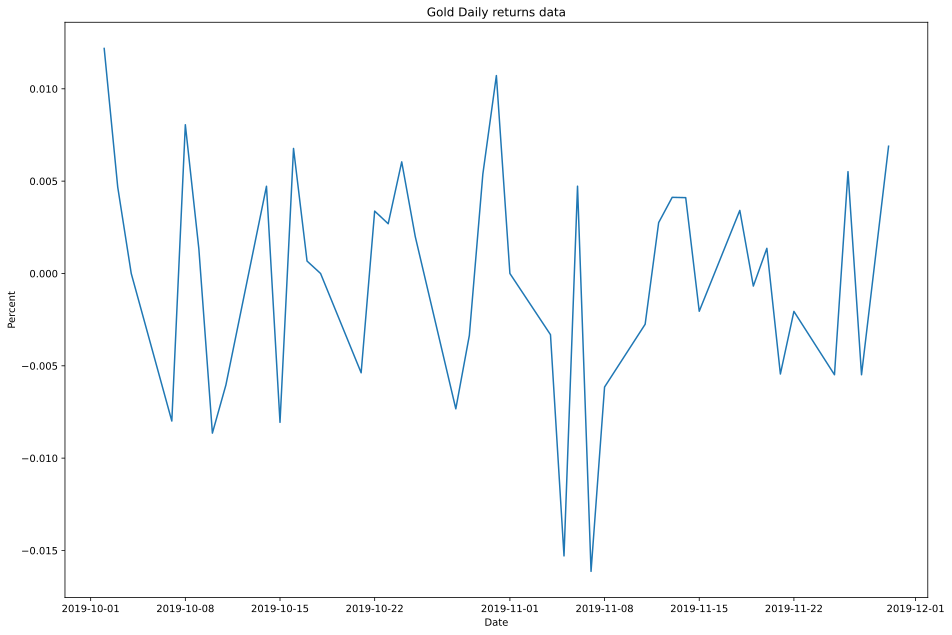

Date
2019-10-02    0.012187
2019-10-03    0.004682
2019-10-04    0.000000
2019-10-07   -0.007989
2019-10-08    0.008054
2019-10-09    0.001332
2019-10-10   -0.008644
2019-10-11   -0.006036
2019-10-14    0.004723
2019-10-15   -0.008059
2019-10-16    0.006770
2019-10-17    0.000673
2019-10-18    0.000000
2019-10-21   -0.005376
2019-10-22    0.003378
2019-10-23    0.002694
2019-10-24    0.006044
2019-10-25    0.002003
2019-10-28   -0.007328
2019-10-29   -0.003356
2019-10-30    0.005387
2019-10-31    0.010717
2019-11-01    0.000000
2019-11-04   -0.003313
2019-11-05   -0.015293
2019-11-06    0.004727
2019-11-07   -0.016129
2019-11-08   -0.006148
2019-11-11   -0.002749
2019-11-12    0.002757
2019-11-13    0.004124
2019-11-14    0.004107
2019-11-15   -0.002045
2019-11-18    0.003415
2019-11-19   -0.000681
2019-11-20    0.001362
2019-11-21   -0.005442
2019-11-22   -0.002052
2019-11-25   -0.005483
2019-11-26    0.005513
2019-11-27   -0.005483
2019-11-29    0.006892
Name: Close, dtype: float64

In [ ]:
GoldDailyReturnsDf = goldDf['Close'].pct_change()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,2,2])
ax1.plot(GoldDailyReturnsDf)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Gold Daily returns data") 
plt.show()
GoldDailyReturnsDf.dropna()

### 2.2 Daily returns of Equity ETF

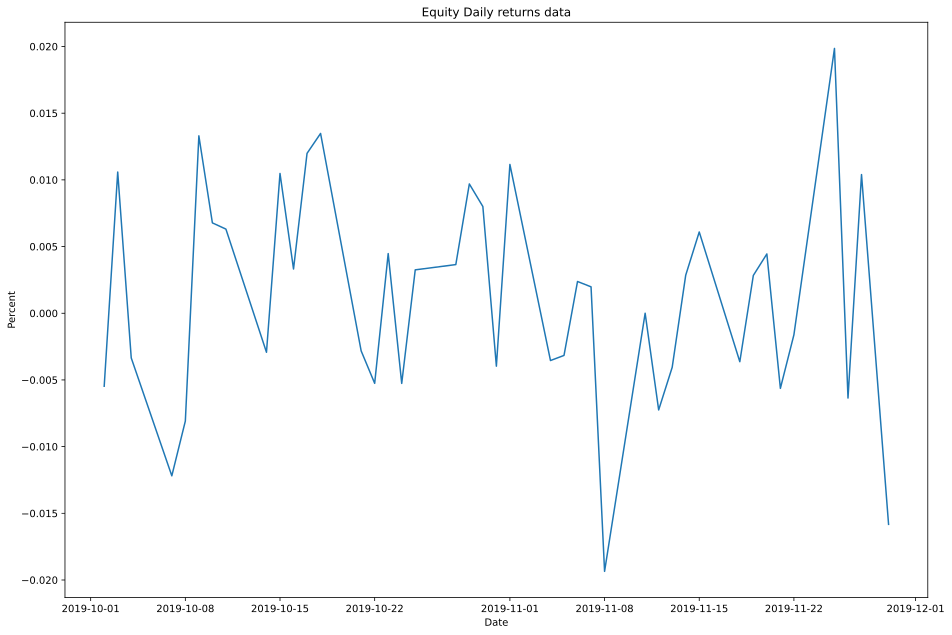

Date
2019-10-02   -0.005474
2019-10-03    0.010584
2019-10-04   -0.003351
2019-10-07   -0.012190
2019-10-08   -0.008085
2019-10-09    0.013299
2019-10-10    0.006774
2019-10-11    0.006308
2019-10-14   -0.002925
2019-10-15    0.010478
2019-10-16    0.003318
2019-10-17    0.011988
2019-10-18    0.013480
2019-10-21   -0.002821
2019-10-22   -0.005255
2019-10-23    0.004470
2019-10-24   -0.005259
2019-10-25    0.003253
2019-10-28    0.003648
2019-10-29    0.009693
2019-10-30    0.008000
2019-10-31   -0.003968
2019-11-01    0.011155
2019-11-04   -0.003546
2019-11-05   -0.003163
2019-11-06    0.002380
2019-11-07    0.001979
2019-11-08   -0.019352
2019-11-11    0.000000
2019-11-12   -0.007249
2019-11-13   -0.004057
2019-11-14    0.002851
2019-11-15    0.006093
2019-11-18   -0.003633
2019-11-19    0.002836
2019-11-20    0.004444
2019-11-21   -0.005632
2019-11-22   -0.001618
2019-11-25    0.019854
2019-11-26   -0.006357
2019-11-27    0.010396
2019-11-29   -0.015829
Name: Close, dtype: float64

In [ ]:
EquityDailyReturnsDf = equityDf['Close'].pct_change()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,2,2])
ax1.plot(EquityDailyReturnsDf)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Equity Daily returns data")
plt.show()
EquityDailyReturnsDf.dropna()

## 3 Data Summary 


### 3.1 Average yield calculation for each benchmark security for Oct and Nov 19.

In [ ]:
USTYOctDf.mean()

2 Yr     1.552857
3 Yr     1.528571
5 Yr     1.525714
7 Yr     1.615714
10 Yr    1.707619
30 Yr    2.191429
dtype: float64

In [ ]:
USTYNovDf.mean()

2 Yr     1.607895
3 Yr     1.607368
5 Yr     1.633684
7 Yr     1.728947
10 Yr    1.807368
30 Yr    2.278421
dtype: float64

### 3.2 Average price calculation for Gold ETF for Oct and Nov 19.

In [ ]:
goldOctDf['Close'].mean()

14.906818303194912

In [ ]:
goldNovDf['Close'].mean()

14.67450008392334

###3.3 Average price calculation for Equity ETF for Oct and Nov.

In [ ]:
equityOctDf['Close'].mean()

23.91993774067272

In [ ]:
equityNovDf['Close'].mean()

24.624325942993163

### 3.4 Standard deviation calculation for each benchmark security for Oct and Nov 19.

In [ ]:
USTYOctDf.std()

2 Yr     0.081984
3 Yr     0.098807
5 Yr     0.106985
7 Yr     0.103081
10 Yr    0.107327
30 Yr    0.103696
dtype: float64

In [ ]:
USTYNovDf.std()

2 Yr     0.039941
3 Yr     0.048858
5 Yr     0.060481
7 Yr     0.068548
10 Yr    0.070541
30 Yr    0.079461
dtype: float64

### 3.5 Standard deviation calculation for Gold ETF for Oct and Nov 19.

In [ ]:
goldOctDf['Close'].std()

0.08190505794328766

In [ ]:
goldNovDf['Close'].std()

0.16349713031571925

###3.6 Standard deviation calculation for Equity ETF for Oct and Nov 19.

In [ ]:
equityOctDf['Close'].std()

0.5409890926123577

In [ ]:
equityNovDf['Close'].std()

0.27104477235718005

##4 Graphing



###4.1 Graph of 6 yield series for Oct to Nov 19

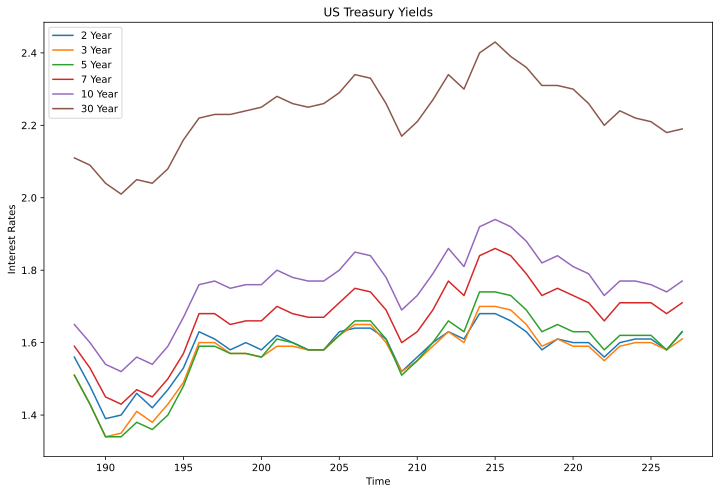

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(USTYgraphDf['2 Yr'],label = "2 Year")
plt.plot(USTYgraphDf['3 Yr'],label = "3 Year")
plt.plot(USTYgraphDf['5 Yr'],label = "5 Year")
plt.plot(USTYgraphDf['7 Yr'],label = "7 Year")
plt.plot(USTYgraphDf['10 Yr'],label = "10 Year")
plt.plot(USTYgraphDf['30 Yr'],label = "30 Year")

plt.xlabel('Time')  
plt.ylabel('Interest Rates')  
plt.title('US Treasury Yields') 
plt.legend() 
plt.show() 


###4.2 Graph of Gold ETF for Oct to Nov 19

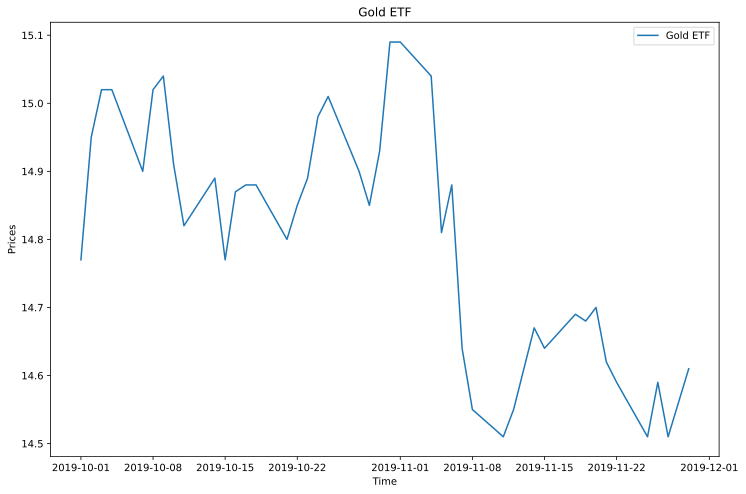

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(goldDf['Close'],label ="Gold ETF")
plt.xlabel('Time')  
plt.ylabel('Prices')  
plt.title('Gold ETF')
plt.legend() 
plt.show() 


###4.3 Graph of Gold ETF and Equity ETF with different axis for Oct to Nov 19

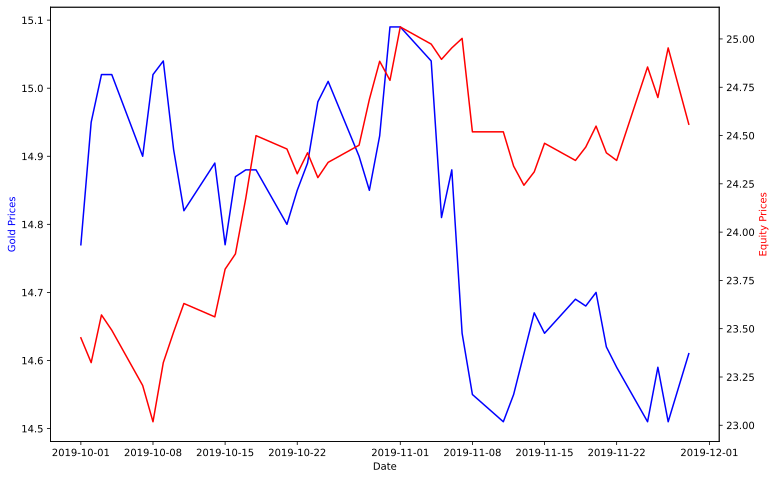

<Figure size 1080x720 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(goldDf['Close'],label ="Gold ETF", color='blue')
ax.set_xlabel("Date")
ax.set_ylabel("Gold Prices",color='blue')
ax2 = ax.twinx()
ax2.plot(equityDf['Close'],label ="Equity ETF", color='red')
ax2.set_ylabel("Equity Prices",color='red')
plt.figure(figsize=(15,10))
plt.show()


## 5 Fitting the Yield Curve


### 5.1 Nelson-Siegel Model Formula

$$
{\displaystyle y\left(m\right)=\beta _{0}+\beta _{1}{\frac {\left[{1-\exp \left({-m/\tau }\right)}\right]}{m/\tau }}+\beta _{2}{\left({\frac {\left[{1-\exp \left({-m/\tau }\right)}\right]}{m/\tau }}-\exp \left({-m/\tau }\right)\right)}}
$$

$\beta _{0}$ is interpreted as the long run levels of interest rates

$\beta _{1}$ is the short-term component 

$\beta _{2}$ is the medium-term component 

$\tau$ is the decay factor (small values produce slow decay and can better fit the curve at long maturities, while large values produce fast decay and can better fit the curve at short maturities)

### 5.2 Yield curve fit for 6 benchmark yields in Oct 19


In [ ]:
t = np.array([2, 3, 5, 7, 10, 30])
y = USTYOctDf.mean().to_numpy()

curve, status = calibrate.calibrate_ns_ols(t, y, tau0=1.0)
curve

NelsonSiegelCurve(beta0=2.5349285467193634, beta1=-0.8093012940478548, beta2=-1.8938643499591183, tau=3.827352446865678)

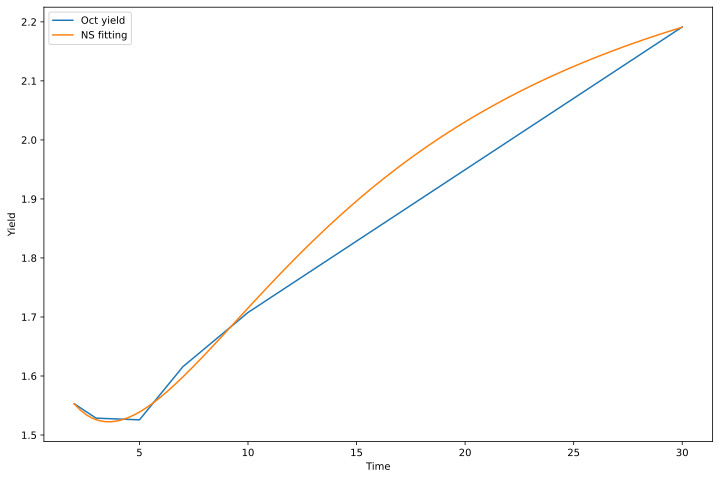

In [ ]:
t1 = np.linspace(2, 30, 100)
plt.figure(figsize=(12,8))
plt.xlabel('Time')  
plt.ylabel('Yield')
plt.plot(t, USTYOctDf.mean().to_numpy(), label = 'Oct yield')
plt.plot(t1, curve(t1), label = 'NS fitting')
plt.legend()
plt.show()

### 5.3 Yield curve fit for 6 benchmark yields in Nov 19


In [ ]:
t = np.array([2, 3, 5, 7, 10, 30])
y = USTYNovDf.mean().to_numpy()

curve, status = calibrate.calibrate_ns_ols(t, y, tau0=1.0)
curve

NelsonSiegelCurve(beta0=2.6542663456361786, beta1=-0.9995912950241317, beta2=-1.4569802240008296, tau=4.630128627822528)

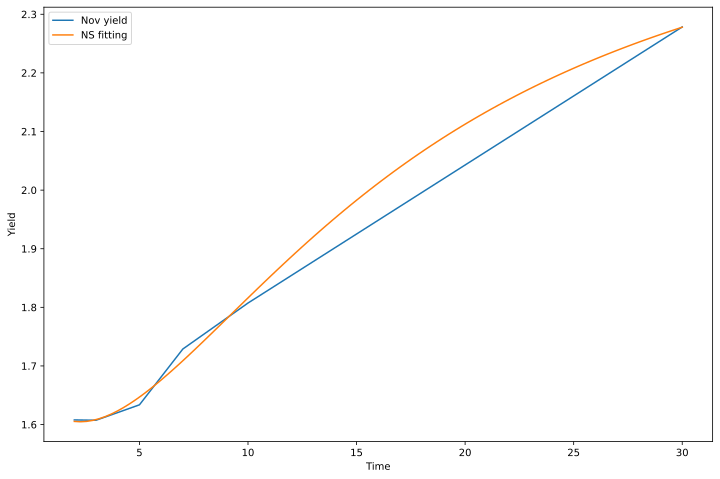

In [ ]:
t1 = np.linspace(2, 30, 100)
plt.figure(figsize=(12,8))
plt.xlabel('Time')
plt.ylabel('Yield')
plt.plot(t, USTYNovDf.mean().to_numpy(), label = 'Nov yield')
plt.plot(t1, curve(t1), label = 'NS fitting')
plt.legend()
plt.show()

### 5.4 Significant Changes and parameter based observation

For short-term banchmarks (< 1 year) there was a difference (~0.3% refer section 1.1) between the yields of October and November with the former month having greater yields.

Since it is expected to fit models spanning a time period of over 2-years, there is not much difference in the yields of both months. Therefore the parameters for the Nelson-Siegel model are approximately similar.

Since we have a large $\tau$ the decay of curve is slower.



##6 Modelling Prices


In [ ]:
def mean_absolute_error(true, pred): 
    true, pred = np.array(true), np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

### 6.1 ARIMA model fit for Gold ETF in Oct 19

In [ ]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(goldOctDf['Close'])
train = goldOctDf['Close'][:20]
test = goldOctDf['Close'][-5:]

In [ ]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20, n_fits = 50 )
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-9.062, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-5.767, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-6.859, Time=0.18 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-7.062, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-7.062, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-5.062, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-7.767, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-8.859, Time=0.10 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-5.576, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=-7.234, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 0.972 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   20
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                   5.531
Date:                            Mon, 11 Jan 2021   AIC                             -9.062
Time:                                    18:54:57   BIC                             -9.116
Sample:                                         0   HQIC                            -9.730
                                             - 20                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0121      0.008      1.437      0.151      -0.004       0.028
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.37   Prob(JB):                         0.88
Heteroskedasticity (H):               0.01   Skew:                            -0.08
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 5),index=test.index)
prediction.columns = ['predicted_price']
prediction

,predicted_price
Date,
2019-10-24,14.809999
2019-10-25,14.880000
2019-10-28,14.760000
2019-10-29,14.860000
2019-10-30,14.870000


In [ ]:
mean_absolute_error(test, prediction)

0.6871074060816017

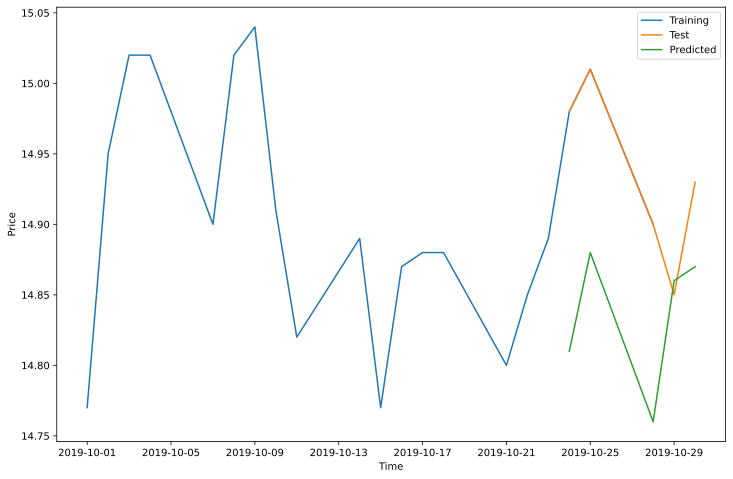

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### 6.2 ARIMA model fit for Gold ETF in Nov 19

In [ ]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(goldNovDf['Close'])
train = goldNovDf['Close'][:17]
test = goldNovDf['Close'][-5:]

In [ ]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-3.252, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=0.137, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=0.396, Time=0.10 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-1.252, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-1.252, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=0.748, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-1.863, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-1.604, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=0.084, Time=0.09 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=-2.743, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 0.673 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3100: UserWarning: Early subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  ' calculate test statistic.' % i)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3105: UserWarning: Later subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  ' calculate test statistic.' % i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   17
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                   2.626
Date:                            Mon, 11 Jan 2021   AIC                             -3.252
Time:                                    18:54:59   BIC                             -3.866
Sample:                                         0   HQIC                            -4.599
                                             - 17                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0157      0.029      0.544      0.587      -0.041       0.073
===================================================================================
Ljung-Box (L1) (Q):                   3.55   Jarque-Bera (JB):                 0.61
Prob(Q):                              0.06   Prob(JB):                         0.74
Heteroskedasticity (H):                nan   Skew:                            -0.81
Prob(H) (two-sided):                   nan   Kurtosis:                         2.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 5),index=test.index)
prediction.columns = ['predicted_price']
prediction

,predicted_price
Date,
2019-11-22,14.42
2019-11-25,14.38
2019-11-26,14.42
2019-11-27,14.48
2019-11-29,14.54


In [ ]:
r2_score(test, prediction)
mean_absolute_error(test, prediction)

0.8150714943174757

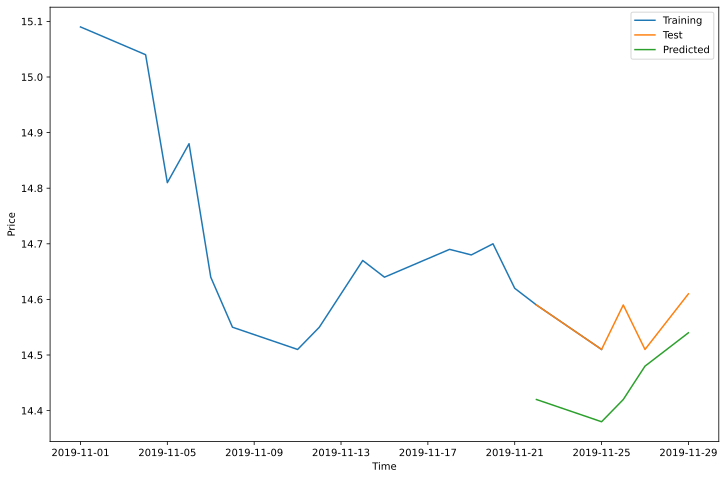

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

###6.3 ARIMA model fit for Equity ETF in Oct 19

In [ ]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(equityOctDf['Close'])
train = equityOctDf['Close'][:20]
test = equityOctDf['Close'][-5:]

In [ ]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3.727, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7.194, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5.727, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=5.727, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=7.727, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5.194, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=6.376, Time=0.10 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=7.400, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=5.610, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 0.774 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   20
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                  -0.863
Date:                            Mon, 11 Jan 2021   AIC                              3.727
Time:                                    18:55:00   BIC                              3.673
Sample:                                         0   HQIC                             3.058
                                             - 20                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0749      0.056      1.339      0.180      -0.035       0.185
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.46   Prob(JB):                         0.73
Heteroskedasticity (H):               0.18   Skew:                             0.41
Prob(H) (two-sided):                  0.31   Kurtosis:                         1.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 5),index=test.index)
prediction.columns = ['predicted_price']
prediction

,predicted_price
Date,
2019-10-24,24.598158
2019-10-25,24.529034
2019-10-28,24.775906
2019-10-29,24.854902
2019-10-30,25.141272


In [ ]:
r2_score(test, prediction)
mean_absolute_error(test, prediction)

1.3453168457237479

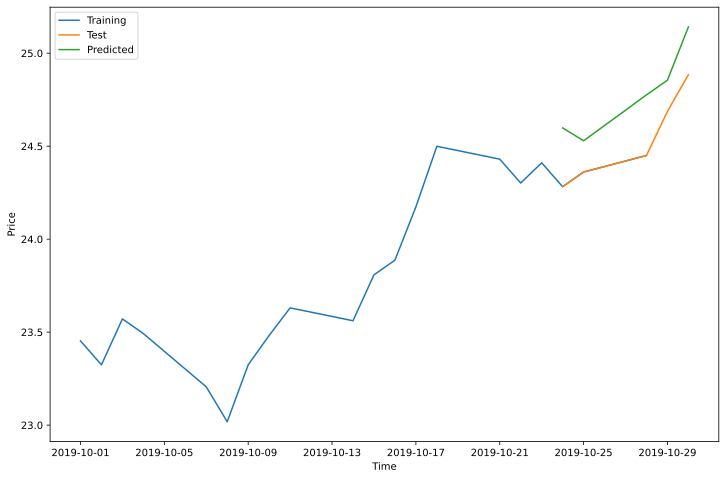

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


### 6.4 ARIMA model fit for Equity ETF in Nov 19

In [ ]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(goldOctDf['Close'])
train = equityNovDf['Close'][:17]
test = equityNovDf['Close'][-5:]

In [ ]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2.115, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5.464, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4.115, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4.115, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=6.115, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3.551, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3.464, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=5.116, Time=0.08 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=3.054, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 0.954 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3100: UserWarning: Early subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  ' calculate test statistic.' % i)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3105: UserWarning: Later subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  ' calculate test statistic.' % i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   17
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                  -0.058
Date:                            Mon, 11 Jan 2021   AIC                              2.115
Time:                                    18:55:01   BIC                              1.502
Sample:                                         0   HQIC                             0.769
                                             - 17                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0603      0.048      1.251      0.211      -0.034       0.155
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.50   Prob(JB):                         0.79
Heteroskedasticity (H):                nan   Skew:                             0.41
Prob(H) (two-sided):                   nan   Kurtosis:                         1.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 5), index=test.index)
prediction.columns = ['predicted_price']
prediction

,predicted_price
Date,
2019-11-22,24.371037
2019-11-25,24.371037
2019-11-26,24.193289
2019-11-27,24.094542
2019-11-29,24.163666


In [ ]:
r2_score(test, prediction)
mean_absolute_error(test, prediction)

1.8090381772222643

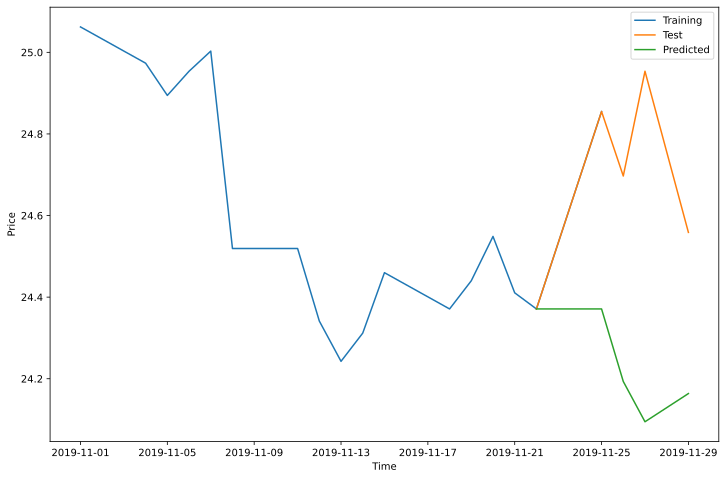

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### 6.4/5 Judging best model for each ETF in each month

The auto ARIMA model concluded the best model based on the lowest Akaike Information Critera. The AIC measures the best fit and the simplicity of the ARIMA model.

In each case the best ARIMA model had the following parameters:
* p = 0
* d = 1
* q = 0

that is ARIMA(0,1,0).

d = 1 implies that the model is able to better fit if the differencing process is performed once.

**NOTE:** Since the model is trained using only a few points (15-25 points), in some cases the model might not be able to figure out the time series patterns accurately.


## 7. Modelling Volatility

### 7.1 Daily high-low difference and average of Gold ETF for Oct and Nov 19

In [ ]:
#gold ETF prices (High-Low)
goldOctDf['HighLowDiff'] = goldOctDf["High"] - goldOctDf["Low"]
goldNovDf['HighLowDiff'] = goldNovDf["High"] - goldNovDf["Low"]
print(goldOctDf['HighLowDiff'])
print(goldNovDf['HighLowDiff'])

Date
2019-10-01    0.245000
2019-10-02    0.145000
2019-10-03    0.200000
2019-10-04    0.115000
2019-10-07    0.160000
2019-10-08    0.110001
2019-10-09    0.090000
2019-10-10    0.105000
2019-10-11    0.160000
2019-10-14    0.050000
2019-10-15    0.110001
2019-10-16    0.089000
2019-10-17    0.065001
2019-10-18    0.036000
2019-10-21    0.130000
2019-10-22    0.062000
2019-10-23    0.043000
2019-10-24    0.083000
2019-10-25    0.145000
2019-10-28    0.097000
2019-10-29    0.080000
2019-10-30    0.157001
Name: HighLowDiff, dtype: float64
Date
2019-11-01    0.090000
2019-11-04    0.075000
2019-11-05    0.155000
2019-11-06    0.080000
2019-11-07    0.280001
2019-11-08    0.099999
2019-11-11    0.136000
2019-11-12    0.145000
2019-11-13    0.065001
2019-11-14    0.100000
2019-11-15    0.050000
2019-11-18    0.061000
2019-11-19    0.090000
2019-11-20    0.100000
2019-11-21    0.080000
2019-11-22    0.080000
2019-11-25    0.067000
2019-11-26    0.120000
2019-11-27    0.040000
2019-11-29   

In [ ]:
print("Gold Oct 19 high-low diff average: " + str(goldOctDf['HighLowDiff'].mean()))
print("Gold Nov 19 high-low diff average: "+ str(goldNovDf['HighLowDiff'].mean()))

Gold Oct 19 high-low diff average: 0.1125910065390847
Gold Nov 19 high-low diff average: 0.10145001411437989



### 7.2 Standard deviation of Gold ETF returns in Oct and Nov 19

In [ ]:
goldOctRet = goldOctDf['Close'].pct_change().dropna()
goldOctStd = goldOctRet.std()
print("Gold Oct returns std: " + str(goldOctStd))
goldNovRet = goldNovDf['Close'].pct_change().dropna()
goldNovStd = goldNovRet.std()
print("Gold Nov returns std: " + str(goldNovStd))

Gold Oct returns std: 0.006007526965679568
Gold Nov returns std: 0.006457268473084142


### 7.3.1 GARCH(1,1) model fit using Gold ETF returns of Oct 19


In [ ]:
train = goldOctRet[:20]
test = goldOctRet[-5:]
# multiplying with scaling_factor for scaling for better convergence
scaling_factor = 100 
model = arch_model(scaling_factor*train, p=1, q=1) 
# fit model
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 17.715718691995367
Iteration:      2,   Func. Count:     14,   Neg. LLF: 17.63753422696612
Iteration:      3,   Func. Count:     22,   Neg. LLF: 17.634325431917908
Iteration:      4,   Func. Count:     29,   Neg. LLF: 17.616411382264527
Iteration:      5,   Func. Count:     36,   Neg. LLF: 17.598976139991855
Iteration:      6,   Func. Count:     43,   Neg. LLF: 17.58066772820968
Iteration:      7,   Func. Count:     50,   Neg. LLF: 17.56271444837731
Iteration:      8,   Func. Count:     57,   Neg. LLF: 17.54689221211889
Iteration:      9,   Func. Count:     65,   Neg. LLF: 17.543079194900105
Iteration:     10,   Func. Count:     71,   Neg. LLF: 17.38989542711978
Iteration:     11,   Func. Count:     78,   Neg. LLF: 17.332596894552285
Iteration:     12,   Func. Count:     84,   Neg. LLF: 17.330008416808386
Iteration:     13,   Func. Count:     90,   Neg. LLF: 17.32800934476579
Iteration:     14,   Func. Count:     96,   Neg. LLF: 17.

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -17.3280
Distribution:                  Normal   AIC:                           42.6560
Method:            Maximum Likelihood   BIC:                           46.6389
                                        No. Observations:                   20
Date:                Mon, Jan 11 2021   Df Residuals:                       16
Time:                        18:55:02   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         8.4032e-03      0.118  7.101e-02      0.943 [ -0.224,  0.240]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.0000  7.865e-02      0.000      1.000 [ -0.154,  0.154]
alpha[1]       0.0000      0.170      0.000      1.000 [ -0.333,  0.333]
beta[1]        0.9681      0.434      2.229  2.583e-02 [  0.117,  1.820]
========================================================================

Covariance estimator: robust
"""

In [ ]:
# forecast the test set
prediction = pd.DataFrame(model_fit.forecast(horizon=5).variance.values[-1, :]/scaling_factor, index=test.index)
prediction.columns = ['predicted_price']
prediction

,predicted_price
Date,
2019-10-24,0.002056
2019-10-25,0.001991
2019-10-28,0.001928
2019-10-29,0.001866
2019-10-30,0.001807


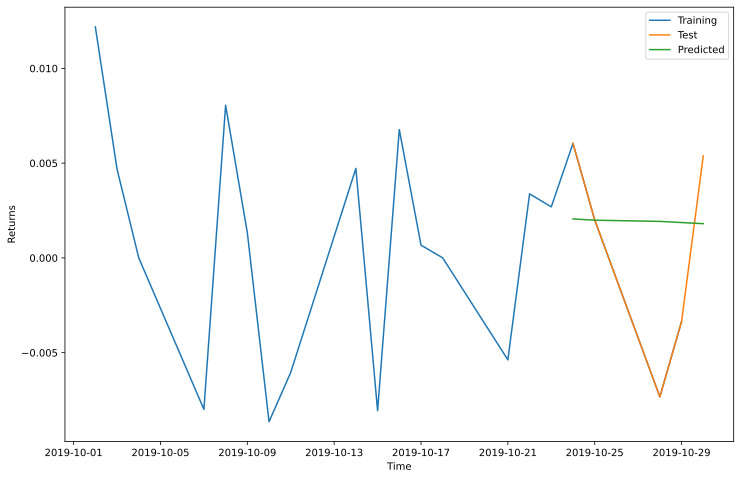

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

### 7.3.2 GARCH(1,1) using gold returns of Nov 19


In [ ]:
train = goldNovRet[0:17]
test = goldNovRet[-5:]
# multiplying with scaling_factor for scaling for better convergence
scaling_factor = 100 
model = arch_model(scaling_factor*train, p=1, q=1) 
# fit model
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15.809734647916901
Iteration:      2,   Func. Count:     14,   Neg. LLF: 15.728014962210882
Iteration:      3,   Func. Count:     22,   Neg. LLF: 15.713030254421898
Iteration:      4,   Func. Count:     29,   Neg. LLF: 15.667735338375898
Iteration:      5,   Func. Count:     36,   Neg. LLF: 15.62008966734045
Iteration:      6,   Func. Count:     43,   Neg. LLF: 15.576530145371052
Iteration:      7,   Func. Count:     50,   Neg. LLF: 15.533251972617675
Iteration:      8,   Func. Count:     57,   Neg. LLF: 15.508596914408882
Iteration:      9,   Func. Count:     64,   Neg. LLF: 15.485351273166094
Iteration:     10,   Func. Count:     71,   Neg. LLF: 15.46352359430073
Iteration:     11,   Func. Count:     78,   Neg. LLF: 15.442978602075254
Iteration:     12,   Func. Count:     85,   Neg. LLF: 15.4237275515628
Iteration:     13,   Func. Count:     92,   Neg. LLF: 15.406026915152191
Iteration:     14,   Func. Count:     98,   Neg. LLF: 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.009
Mean Model:             Constant Mean   Adj. R-squared:                 -0.009
Vol Model:                      GARCH   Log-Likelihood:               -15.0759
Distribution:                  Normal   AIC:                           38.1517
Method:            Maximum Likelihood   BIC:                           41.4846
                                        No. Observations:                   17
Date:                Mon, Jan 11 2021   Df Residuals:                       13
Time:                        18:55:02   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1386      0.140     -0.986      0.324 [ -0.414,  0.137]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.1434e-14  3.586e-02  5.978e-13      1.000 [-7.028e-02,7.028e-02]
alpha[1]   8.5790e-14  4.304e-02  1.993e-12      1.000 [-8.436e-02,8.436e-02]
beta[1]        0.9418      0.175      5.392  6.983e-08      [  0.599,  1.284]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
# forecast the test set
prediction = pd.DataFrame(model_fit.forecast(horizon=5).variance.values[-1, :]/scaling_factor, index=test.index)
prediction.columns = ['predicted_price']
prediction

,predicted_price
Date,
2019-11-22,0.001618
2019-11-25,0.001524
2019-11-26,0.001435
2019-11-27,0.001352
2019-11-29,0.001273


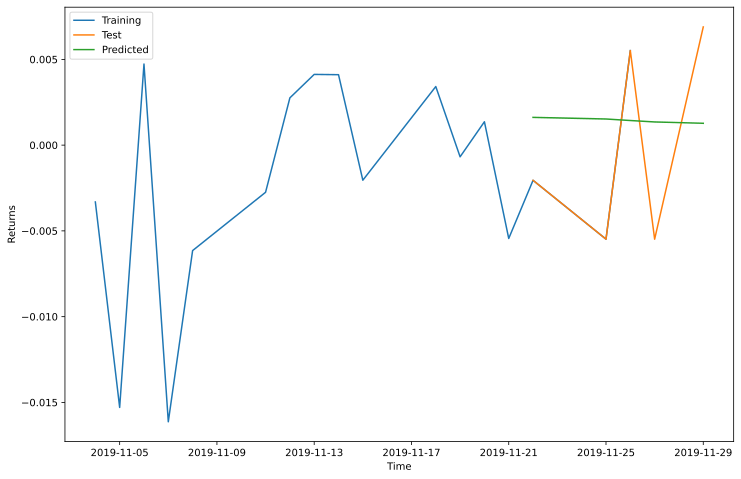

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

### 7.4 Significant changes in GARCH model for Gold returns between Oct and Nov 19

**NOTE**:
Since the return values were small, it becomes difficult for the GARCH model computationally to work with values near zero.

The returns were scaled up by multiplting by a factor of 100 during training, so that the GARCH model is able to fit correctly.

Then the predicted values were scaled down by dividing by 100.

GARCH(1,1) is used for both the months.

The predictions for the month of November indicate higher volatility than October.

### 7.5 Daily high-low difference and average of Equity ETF for Oct and Nov 19

In [ ]:
equityOctDf['HighLowDiff'] = equityOctDf["High"] - equityOctDf["Low"]
equityNovDf['HighLowDiff'] = equityNovDf["High"] - equityNovDf["Low"]
print(equityOctDf['HighLowDiff'])
print(equityNovDf['HighLowDiff'])

Date
2019-10-01    0.118499
2019-10-02    0.108624
2019-10-03    0.128372
2019-10-04    0.157997
2019-10-07    0.098748
2019-10-08    0.118499
2019-10-09    0.157997
2019-10-10    0.167872
2019-10-11    0.118497
2019-10-14    0.078998
2019-10-15    0.157999
2019-10-16    0.059250
2019-10-17    0.069123
2019-10-18    0.069123
2019-10-21    0.118499
2019-10-22    0.118499
2019-10-23    0.078998
2019-10-24    0.118499
2019-10-25    0.167872
2019-10-28    0.098748
2019-10-29    0.118499
2019-10-30    0.177747
Name: HighLowDiff, dtype: float64
Date
2019-11-01    0.148122
2019-11-04    0.128372
2019-11-05    0.138249
2019-11-06    0.088873
2019-11-07    0.059250
2019-11-08    0.078998
2019-11-11    0.059250
2019-11-12    0.108624
2019-11-13    0.098747
2019-11-14    0.108624
2019-11-15    0.049373
2019-11-18    0.088873
2019-11-19    0.098749
2019-11-20    0.108624
2019-11-21    0.049375
2019-11-22    0.059248
2019-11-25    0.157997
2019-11-26    0.128372
2019-11-27    0.138249
2019-11-29   

In [ ]:
print("Equity ETF Oct 19 high-low diff average: " + str(equityOctDf['HighLowDiff'].mean()))
print("Equity ETF Nov 19 high-low diff average: " + str(equityNovDf['HighLowDiff'].mean()))

Equity ETF Oct 19 high-low diff average: 0.11849806340484083
Equity ETF Nov 19 high-low diff average: 0.09973572159155068


### 7.6 Standard deviation of Equity ETF returns in Oct and Nov 19

In [ ]:
equityOctRet = equityOctDf['Close'].pct_change().dropna()
equityOctStd = equityOctRet.std()
print("Equity Oct std: " + str(equityOctStd))
equityNovRet = equityNovDf['Close'].pct_change().dropna()
equityNovStd = equityNovRet.std()
print("Equity Nov std: " + str(equityNovStd))

Equity Oct std: 0.0076763467368507355
Equity Nov std: 0.00872183890098486


### 7.7.1 GARCH(1,1) using Equity returns of Oct 19

In [ ]:
train = equityOctRet[0:16]
test = equityOctRet[-5:]
# multiplying with scaling_factor for scaling for better convergence
scaling_factor = 100 
model = arch_model(scaling_factor*train, p=1, q=1) 
# fit model
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 19.22303924252504
Iteration:      2,   Func. Count:     14,   Neg. LLF: 19.21589960015862
Iteration:      3,   Func. Count:     21,   Neg. LLF: 19.214057105904175
Iteration:      4,   Func. Count:     28,   Neg. LLF: 19.184728574197827
Iteration:      5,   Func. Count:     34,   Neg. LLF: 19.103336446683354
Iteration:      6,   Func. Count:     43,   Neg. LLF: 19.10276464238556
Iteration:      7,   Func. Count:     49,   Neg. LLF: 19.094531729399797
Iteration:      8,   Func. Count:     55,   Neg. LLF: 19.094264971055715
Iteration:      9,   Func. Count:     61,   Neg. LLF: 19.094197461449298
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 19.094197461427243
            Iterations: 9
            Function evaluations: 61
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -19.0942
Distribution:                  Normal   AIC:                           46.1884
Method:            Maximum Likelihood   BIC:                           49.2787
                                        No. Observations:                   16
Date:                Mon, Jan 11 2021   Df Residuals:                       12
Time:                        18:55:03   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2718      0.208      1.309      0.191 [ -0.135,  0.679]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.0000      0.173      0.000      1.000 [ -0.338,  0.338]
alpha[1]   5.4684e-17      0.114  4.803e-16      1.000 [ -0.223,  0.223]
beta[1]        0.9777      0.287      3.403  6.676e-04 [  0.415,  1.541]
========================================================================

Covariance estimator: robust
"""

In [ ]:
# forecast the test set
prediction = pd.DataFrame(model_fit.forecast(horizon=5).variance.values[-1, :]/scaling_factor, index=test.index)
prediction.columns = ['predicted_price']
prediction

,predicted_price
Date,
2019-10-24,0.004753
2019-10-25,0.004647
2019-10-28,0.004544
2019-10-29,0.004443
2019-10-30,0.004344


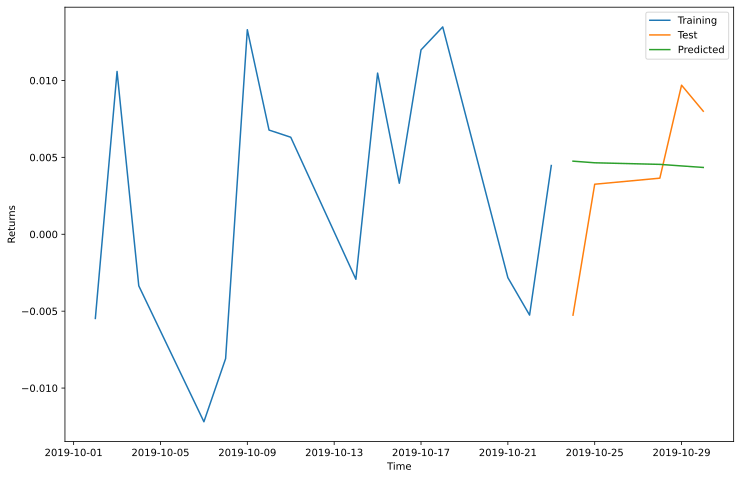

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

### 7.7.2 GARCH(1,1) using Equity returns of Nov 19

In [ ]:
train = equityNovRet[0:17]
test = equityNovRet[-5:]
# multiplying with scaling_factor for scaling for better convergence
scaling_factor = 100 
model = arch_model(scaling_factor*train, p=1, q=1) 
# fit model
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 19.815717396745953
Iteration:      2,   Func. Count:     14,   Neg. LLF: 19.803830631755503
Iteration:      3,   Func. Count:     20,   Neg. LLF: 19.72548734413152
Iteration:      4,   Func. Count:     27,   Neg. LLF: 19.721587897556077
Iteration:      5,   Func. Count:     33,   Neg. LLF: 19.71412192707392
Iteration:      6,   Func. Count:     39,   Neg. LLF: 19.662288631417468
Iteration:      7,   Func. Count:     45,   Neg. LLF: 19.55992168804159
Iteration:      8,   Func. Count:     52,   Neg. LLF: 19.559388637530574
Iteration:      9,   Func. Count:     58,   Neg. LLF: 19.557007317883528
Iteration:     10,   Func. Count:     64,   Neg. LLF: 19.553320853807424
Iteration:     11,   Func. Count:     70,   Neg. LLF: 19.5533193238059
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 19.55331933817743
            Iterations: 11
            Function evaluations: 70
            Gradient evaluati

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -19.5533
Distribution:                  Normal   AIC:                           47.1066
Method:            Maximum Likelihood   BIC:                           50.4395
                                        No. Observations:                   17
Date:                Mon, Jan 11 2021   Df Residuals:                       13
Time:                        18:55:03   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1067      0.353     -0.303      0.762 [ -0.798,  0.584]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.0135      0.521  2.586e-02      0.979 [ -1.008,  1.035]
alpha[1]       0.0000      0.337      0.000      1.000 [ -0.661,  0.661]
beta[1]        1.0000      0.677      1.477      0.140 [ -0.327,  2.327]
========================================================================

Covariance estimator: robust
"""

In [ ]:
# forecast the test set
prediction = pd.DataFrame(model_fit.forecast(horizon=5).variance.values[-1, :]/scaling_factor, index=test.index)
prediction.columns = ['predicted_price']
prediction

,predicted_price
Date,
2019-11-22,0.007772
2019-11-25,0.007907
2019-11-26,0.008042
2019-11-27,0.008177
2019-11-29,0.008312


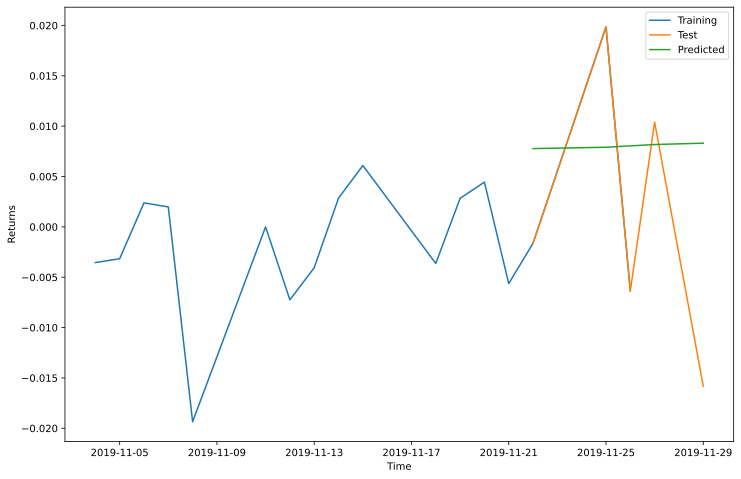

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

### 7.8 Significant changes in GARCH model for Equity returns between Oct and Nov 19

**NOTE**:
Similar to gold returns GARCH model, the returns of equity ETF were scaled up by multiplting by a factor of 100 during training, so that the GARCH model is able to fit correctly.
Then the predicted values were scaled down by dividing by 100.

GARCH(1,1) is also used for both the months.

Even in equity case, predictions for the month of November indicate higher volatility than October.

## 8. Correlation 



### 8.1 Pearson correlation for Gold vs ETF Oct & Nov'19

In [ ]:
oct_corr, _ = pearsonr(goldOctRet, equityOctRet)
nov_corr, _ = pearsonr(goldNovRet, equityNovRet)
print ("Oct corr: " + str(oct_corr))
print ("Nov corr: " + str(nov_corr))

Oct corr: -0.2117361710120391
Nov corr: -0.19362600216877793


## 9 Discussion (included in separate pdf doc)

In [ ]:
index = pd.date_range('2019-09-05', periods=3, freq='M')
columns = ['Rates']
fedRatesDf = pd.DataFrame(index=index, columns=columns)
fedRatesDf['Rates'] = np.array([1.83, 1.55, 1.55])
fedRatesDf

,Rates
2019-09-30,1.83
2019-10-31,1.55
2019-11-30,1.55


### 9.1 As a Gold ETF portfolio manager, write a TECHNICAL 1-page report about the impact of the Fed decision on your portfolio (elaborated in report)

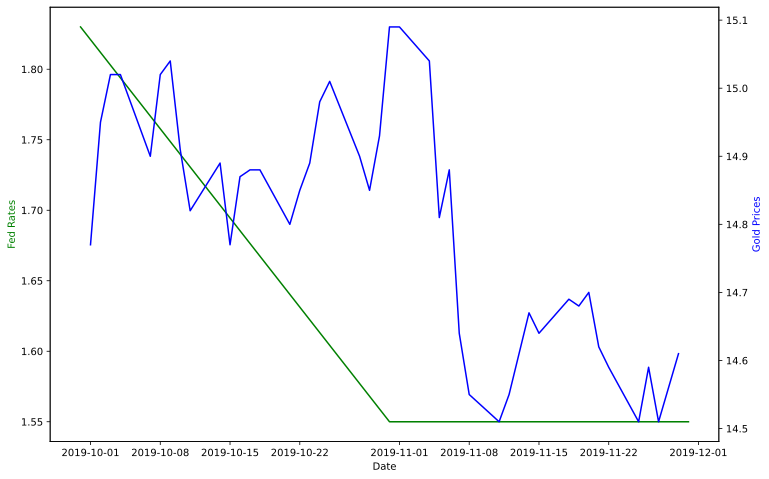

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(fedRatesDf['Rates'], label ="Gold ETF", color='green')
ax.set_xlabel("Date")
ax.set_ylabel("Fed Rates",color='green')
ax2 = ax.twinx()
ax2.plot(goldDf['Close'], label ="Gold ETF", color='blue')
ax2.set_ylabel("Gold Prices", color='blue')
plt.show()

### As an Equity ETF portfolio manager, write a TECHNICAL 1-page report about the impact of the Fed decision on your portfolio (elaborated in report)

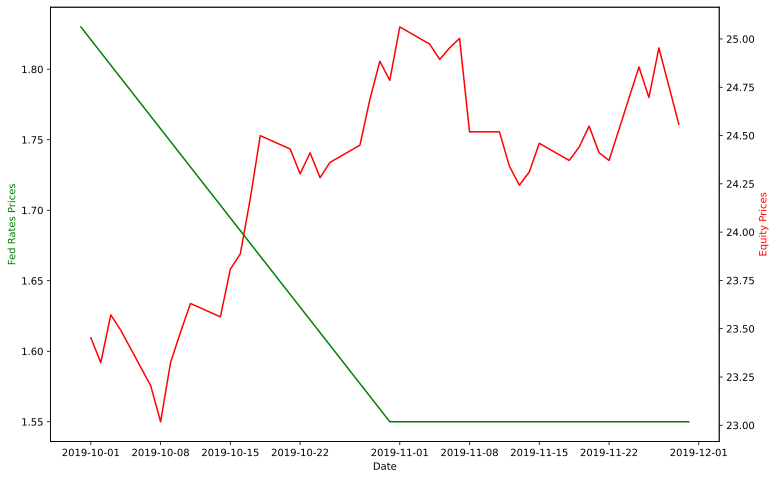

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(fedRatesDf['Rates'], label ="Fed Rates", color='green')
ax.set_xlabel("Date")
ax.set_ylabel("Fed Rates Prices",color='green')
ax2 = ax.twinx()
ax2.plot(equityDf['Close'],label ="Equity ETF", color='red')
ax2.set_ylabel("Equity Prices",color='red')
plt.show()

### 9.3 As a Gold & Equity portfolio manger, write a TECHNICAL 1-page report about the impact of the Fed decision on the 2-asset portfolio (elaborated in report)

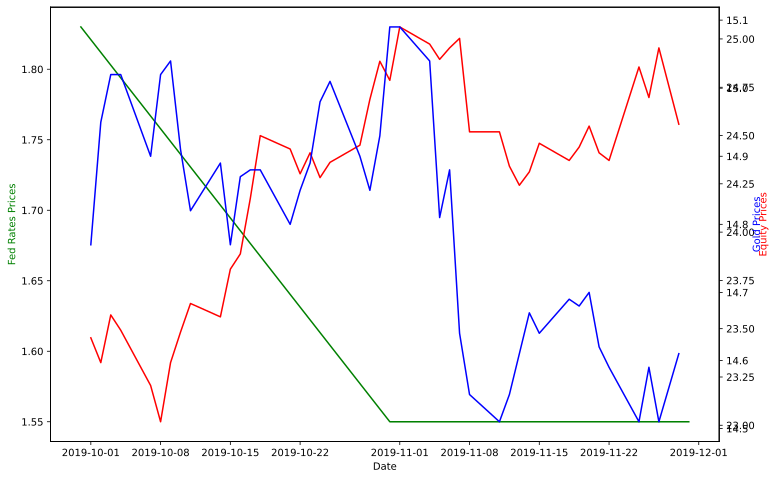

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(fedRatesDf['Rates'], label ="Fed Rates", color='green')
ax.set_xlabel("Date")
ax.set_ylabel("Fed Rates Prices",color='green')
ax2 = ax.twinx()
ax2.plot(equityDf['Close'],label ="Equity ETF", color='red')
ax2.set_ylabel("Equity Prices",color='red')
ax3 = ax.twinx()
ax3.plot(goldDf['Close'], label ="Gold ETF", color='blue')
ax3.set_ylabel("Gold Prices", color='blue')
plt.show()